<a href="https://colab.research.google.com/github/KapilNarayanSingh/Netflix-Movies-and-TV-shows-clustering---Unsupervised-ML/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Netflix Movies and TV Shows Clustering**

##**Project Type - Regression**
##**Contribution**- Team

Team Member 1- Sudhanshu Chouhan

Team Member 2- Kapil Narayan Singh



In [44]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [45]:
#mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
netflix_df = pd.read_csv('/content/drive/MyDrive/netflix tv and shows/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [47]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [48]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [50]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [49]:
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [51]:
netflix_df.shape

(7787, 12)

In [54]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [55]:
netflix_df.duplicated().sum()

0

There are no duplicated values

In [57]:
new_netflix_df=netflix_df.copy()

In [58]:
new_netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [59]:
#total null values
new_netflix_df.isnull().sum().sum()

3631

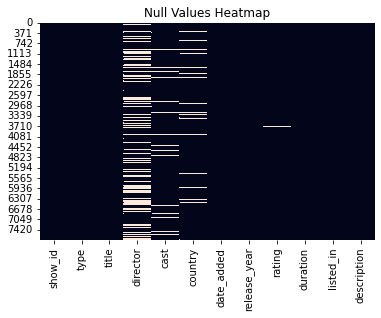

In [60]:
sns.heatmap(new_netflix_df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [62]:
#Handling Null Values
new_netflix_df['cast'].fillna(value='No cast',inplace=True)
new_netflix_df['country'].fillna(value=new_netflix_df['country'].mode()[0],inplace=True)
new_netflix_df.dropna(subset=['date_added','rating'],inplace=True)
new_netflix_df.drop(['director'],axis=1,inplace=True)

In [64]:
new_netflix_df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#** Exploratory Analysis and Visualization **

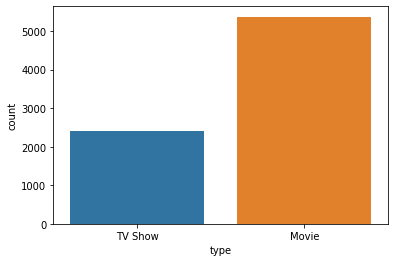

In [66]:
sns.countplot(new_netflix_df['type'])

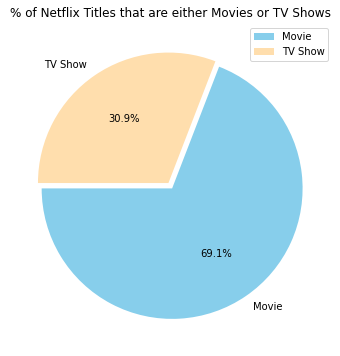

In [67]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(new_netflix_df.type.value_counts(), explode=(0.025,0.025), labels=new_netflix_df.type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

% of Netflix Titles that are either Movies or TV Shows of which the count of Movies is much than that of TV Show

In [69]:
#Movie Ratings based on Target Age Groups
new_netflix_df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

In [70]:
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
new_netflix_df['target_ages'] = new_netflix_df['rating'].replace(ratings)


In [71]:
new_netflix_df['type'] = pd.Categorical(new_netflix_df['type'])

# target_ages is another category (4 classes)
new_netflix_df['target_ages'] = pd.Categorical(new_netflix_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [72]:
tv_shows=new_netflix_df[new_netflix_df['type']=='TV Show']
movies=new_netflix_df[new_netflix_df['type']=='Movie']

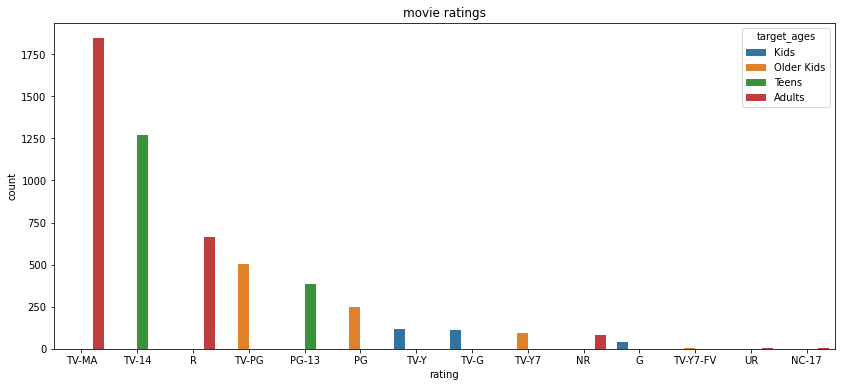

In [73]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(14,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)

In [76]:
new_netflix_df['year_added'] = pd.DatetimeIndex(new_netflix_df['date_added']).year
new_netflix_df['year_added'] = pd.DatetimeIndex(new_netflix_df['date_added']).year
new_netflix_df['year_added'] = pd.DatetimeIndex(new_netflix_df['date_added']).year
new_netflix_df['month_added'] = pd.DatetimeIndex(new_netflix_df['date_added']).month
new_netflix_df['month_added'] = pd.DatetimeIndex(new_netflix_df['date_added']).month
new_netflix_df['month_added'] = pd.DatetimeIndex(new_netflix_df['date_added']).month

In [77]:
netflix_year = new_netflix_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year

,year,count
0,2019,2153
2,2018,1684
3,2017,1222
4,2016,440
5,2021,117
6,2015,88
7,2014,25
8,2011,13
9,2013,11
10,2012,3


In [78]:
netflix_year2 = new_netflix_df[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2020]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2020]

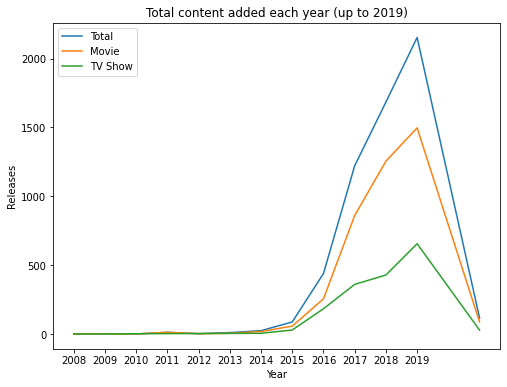

In [80]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

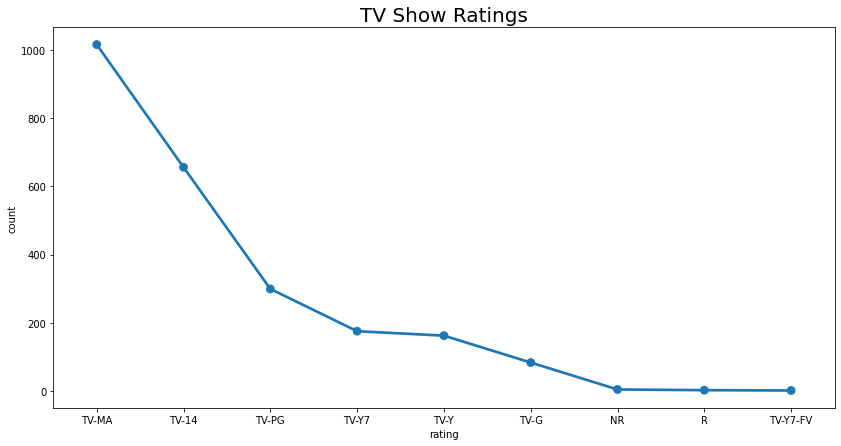

In [81]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()
     

In [85]:

movies_year =movies['release_year'].value_counts().sort_index(ascending=False)
tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)



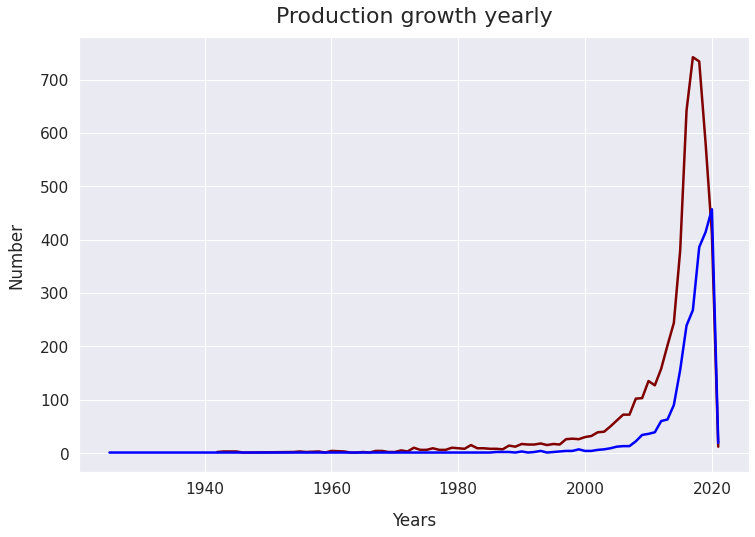

In [86]:
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

In [87]:
# Plotting the heatmap
new_netflix_df['count'] = 1
data = new_netflix_df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']
df_heatmap = new_netflix_df.loc[new_netflix_df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap


country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.204545,0.195346
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.189394,0.243199
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.512626,0.471976


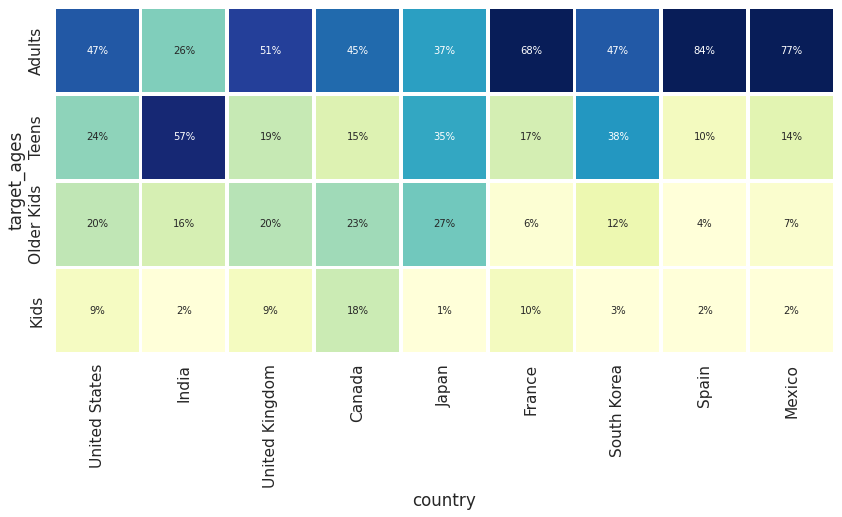

In [90]:

fig, ax = plt.subplots(1, 1, figsize=(14, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=3,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":10})
plt.show()
     